# Cosmic muons

In [224]:
from myst_nb import glue
import matplotlib.font_manager
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib_inline
import numpy as np
import matplotlib.pyplot as plt

from matplotlib import rcParams, cycler, colorbar
plt.ion()

%matplotlib inline
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

cmap = plt.cm.viridis


def format_magnitude(magnitude, precision=3, units="", space=False):
    # List of magnitude prefixes
    prefixes = ["", "k", "M", "G", "T", "P", "E", "Z", "Y"]

    # Divide the magnitude by 1000 for each prefix
    for prefix in prefixes:
        if magnitude < 1E3:
            # If the magnitude is small enough, return the formatted string
            return f"{magnitude:10.{precision}f}{space*' '}{prefix}{units}"
        magnitude /= 1E3

    raise ValueError(f"Magnitude {magnitude} is too large")


# Create a FontProperties object with the desired font
font = matplotlib.font_manager.FontProperties(family='monospace', size=12)

# Set the font as the default font in the rcParams dictionary
matplotlib.rcParams['font.family'] = font.get_family()
matplotlib.rcParams['font.size'] = font.get_size()

plt.rcParams['figure.figsize'] = (8, 5)


In [217]:
def gaisser(energy: float, theta: float) -> float:
    return 0.14 * energy ** -2.7 * (
        1 / (1 + 1.1 * energy * np.cos(theta) / 115.) +
        0.054 / (1 + 1.1 * energy * np.cos(theta) / 850.)
    )

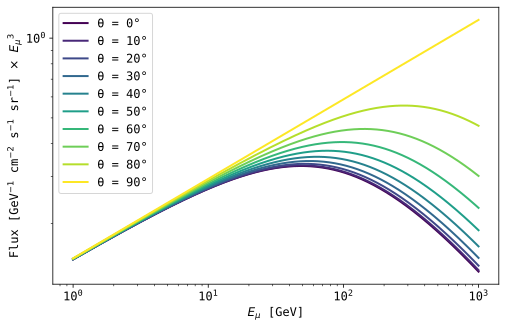

In [225]:
fig, ax = plt.subplots()

energy = np.logspace(0, 3, 1000)

theta_range = np.arange(0, 100, 10) * np.pi / 180.
for i, theta in enumerate(theta_range):
    plt.plot(energy, gaisser(energy, theta) * energy ** 3,
             label=f"θ = {theta * 180 / np.pi:.0f}°", color=cmap(i / (len(theta_range) - 1)), linewidth=2)

plt.yscale('log')
plt.xscale('log')

plt.xlabel(r"$E_{\mu}$ [GeV]")
plt.ylabel(
    r"Flux [GeV$^{-1}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$] $\times$ ${E_{\mu}}^3$")

plt.legend()

glue("muons_energy_varying_theta", fig, display=False)


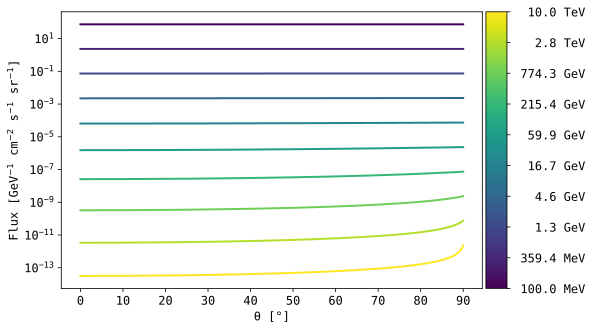

In [226]:
fig, ax = plt.subplots()

energy_range = np.logspace(-1, 4, 10)

theta = np.linspace(0, 90, 1000) * np.pi / 180.
for i, energy in enumerate(energy_range):
    plt.plot(theta * 180. / np.pi, gaisser(energy, theta), label=f"E = {energy:.02f} GeV",
             color=cmap(i / (len(energy_range) - 1)), linewidth=2
             )

plt.yscale('log')

plt.xlabel(r"θ [°]")
plt.ylabel(
    r"Flux [GeV$^{-1}$ cm$^{-2}$ s$^{-1}$ sr$^{-1}$]")
plt.xticks(np.arange(0, 100, 10))

divider = make_axes_locatable(plt.gca())
ax_cb = divider.new_horizontal(size="5%", pad=0.05)
cbar = colorbar.ColorbarBase(
    ax_cb, cmap=cmap, orientation='vertical')
# manually set tick labels
cbar.set_ticks(np.linspace(0, 1, len(energy_range)))
# use energy_range to set tick labels
cbar.set_ticklabels([format_magnitude(e * 1E9, precision=1, units="eV", space=True) for e in energy_range], ha="right")
cbar.ax.yaxis.set_tick_params(pad=75)
plt.gcf().add_axes(ax_cb)

plt.show()

glue("muons_theta_varying_energy", fig, display=False)
